In [2]:
import pandas as pd
import numpy as np
import pandas.core.series as pcs

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [3]:
def  get_percent_nans(df, column_name):
    colSize = df.shape[0]
    empty = df.loc[df[column_name].isna()]
    emptySize = empty.shape[0]
    return (emptySize/colSize) * 100

In [4]:
df = pd.read_csv('C:\\Users\\birju\\Documents\\CS 301\\NYPD_Complaint_Data_Current__Year_to_Date_.csv')
df = df.drop(['CMPLNT_FR_DT', 'CMPLNT_NUM', 'ADDR_PCT_CD', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'HADEVELOPT', 'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD', 'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Lat_Lon'], axis=1)
df.head()

,BORO_NM,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,LAW_CAT_CD,Latitude,Longitude
0,BRONX,18:00:00,COMPLETED,FELONY,40.838026,-73.881681
1,MANHATTAN,20:30:00,COMPLETED,MISDEMEANOR,40.800334,-73.945657
2,BROOKLYN,16:55:00,COMPLETED,FELONY,40.669832,-73.939376
3,BRONX,19:32:00,COMPLETED,MISDEMEANOR,40.873671,-73.908014
4,MANHATTAN,15:30:00,COMPLETED,MISDEMEANOR,40.760935,-73.994529


In [5]:
for col in df.columns:
    print('The \"{}\" column has {:.2f}% empty values'.format(col, get_percent_nans(df, col)))

The "BORO_NM" column has 0.07% empty values
The "CMPLNT_FR_TM" column has 0.00% empty values
The "CRM_ATPT_CPTD_CD" column has 0.00% empty values
The "LAW_CAT_CD" column has 0.00% empty values
The "Latitude" column has 0.00% empty values
The "Longitude" column has 0.00% empty values


In [6]:
df['Latitude'].min()

40.49895701200006

In [7]:
df['Latitude'].max()

40.91272339600005

In [8]:
df['Longitude'].min()

-74.25437700099997

In [9]:
df['Longitude'].max()

-73.70072029399995

In [10]:
def q_summary_V1(numbers):
    dic = {}
    outliers = []
    num = []
    q1 = np.quantile(numbers, .25)
    q2 = np.quantile(numbers, .50)
    q3 = np.quantile(numbers, .75)
    iqr = q3 - q1
    lb, ub = q1 - (1.5*iqr), q3 + (1.5*iqr)
    for i in numbers:
        if i < lb or i > ub:
            outliers.append(i)
        else:
            num.append(i)
    print(len(outliers))
    minimum, maximum = np.min(num), np.max(num) 
    dic['min'], dic['q1'], dic['q2'], dic['q3'], dic['max']  = minimum, q1, q2, q3, maximum
    print("The following are outliers: ", outliers)
    return dic

In [11]:
q_summary_V1(df['Latitude'])

0
The following are outliers:  []


{'min': 40.49895701200006,
 'q1': 40.67525189100007,
 'q2': 40.735323172000044,
 'q3': 40.81237873500004,
 'max': 40.91272339600005}

In [12]:
q_summary_V1(df['Longitude'])

17226
The following are outliers:  [-74.16610830199994, -73.74419626999997, -74.12403095699995, -73.73150635799993, -73.73920862199995, -74.23410772899997, -73.74457892299995, -74.16137912499995, -74.15065813299998, -73.73523390399998, -73.73386566899995, -73.73480369099997, -73.74574306899994, -74.13912928099995, -74.14384146499998, -74.17613467299998, -73.73523390399998, -74.13184092099993, -73.73881244099994, -74.16035909999994, -73.72747536999998, -74.11775663799993, -73.72916162299998, -74.16325809999995, -73.73328593899998, -73.73824062799997, -73.74342495799993, -73.73913314899994, -74.11835969599997, -73.73344101399994, -74.193465039, -73.71537949499998, -73.73608473199994, -73.73887204999993, -74.19690667599998, -73.72834884499997, -74.11315241499993, -74.11863818199998, -74.24574771399993, -73.74662157399997, -73.71773251999997, -74.12915106499997, -73.74424526399997, -74.14923769499995, -74.11328381399994, -74.16981239899997, -73.74141092699995, -73.74502046099997, -74.16136

{'min': -74.10879534499998,
 'q1': -73.97318230099995,
 'q2': -73.92718490399994,
 'q3': -73.88273592499996,
 'max': -73.74707173899995}

In [13]:
empty = df.loc[df['BORO_NM'].isna()]
empty.shape[0]

326

In [14]:
17226/461711 * 100

3.7309052632490887

In [50]:
total = np.zeros(25)
manhattan = np.zeros(25)
queens = np.zeros(25)
bronx = np.zeros(25)
brooklyn = np.zeros(25)
staten_island = np.zeros(25)
felony = np.zeros(25)
misdemeanor = np.zeros(25)
violation = np.zeros(25)

for ind in df.index:
    name = df['BORO_NM'][ind]
    level = df['LAW_CAT_CD'][ind]
    hour = int(str(df['CMPLNT_FR_TM'][ind])[0:2])
    total[hour] += 1
    if name == 'MANHATTAN':
        manhattan[hour] += 1
    if name == 'QUEENS':
        queens[hour] += 1
    if name == 'BRONX':
        bronx[hour] += 1
    if name == 'BROOKLYN':
        brooklyn[hour] += 1
    if name == 'STATEN ISLAND':
        staten_island[hour] += 1
    if level == 'FELONY':
        felony[hour] += 1
    if level == 'MISDEMEANOR':
        misdemeanor[hour] += 1
    if level == 'VIOLATION':
        violation[hour] += 1

In [51]:
total[24] = total[0]
manhattan[24] = manhattan[0]
queens[24] = queens[0]
bronx[24] = bronx[0]
brooklyn[24] = brooklyn[0]
staten_island[24] = staten_island[0]
felony[24] = felony[0]
misdemeanor[24] = misdemeanor[0]
violation[24] = violation[0]

In [60]:
hour= ['12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM', '12.AM']

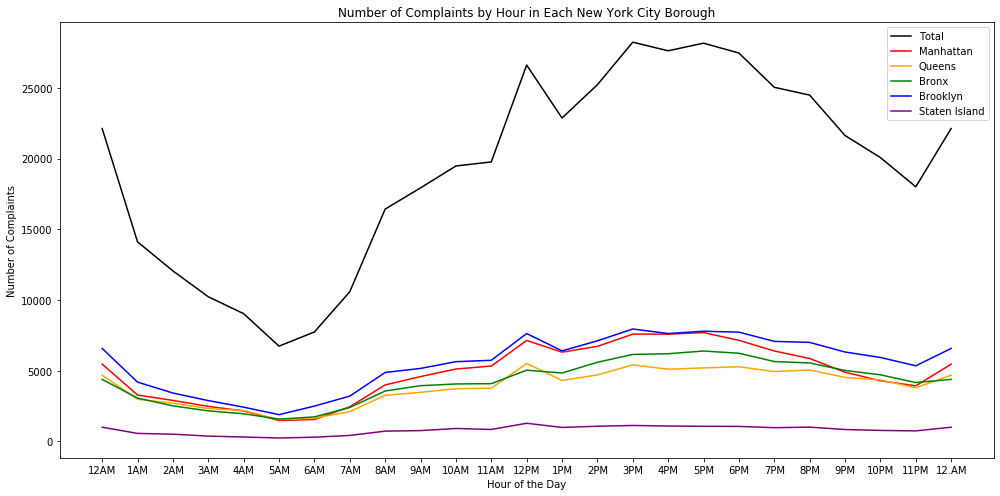

In [66]:
plt.plot(hour, total, color='black')
plt.plot(hour, manhattan, color='red')
plt.plot(hour, queens, color='orange')
plt.plot(hour, bronx, color='green')
plt.plot(hour, brooklyn, color='blue')
plt.plot(hour, staten_island, color='purple')
black_line = mlines.Line2D([], [], color='black', label='Total')
red_line = mlines.Line2D([], [], color='red', label='Manhattan')
orange_line = mlines.Line2D([], [], color='orange', label='Queens')
green_line = mlines.Line2D([], [], color='green', label='Bronx')
blue_line = mlines.Line2D([], [], color='blue', label='Brooklyn')
purple_line = mlines.Line2D([], [], color='purple', label='Staten Island')
plt.legend(handles=[black_line, red_line, orange_line, green_line, blue_line, purple_line])
plt.gcf().set_size_inches(14, 7)
plt.ylabel('Number of Complaints')
plt.xlabel('Hour of the Day')
plt.title('Number of Complaints by Hour in Each New York City Borough')
plt.tight_layout()
plt.show()

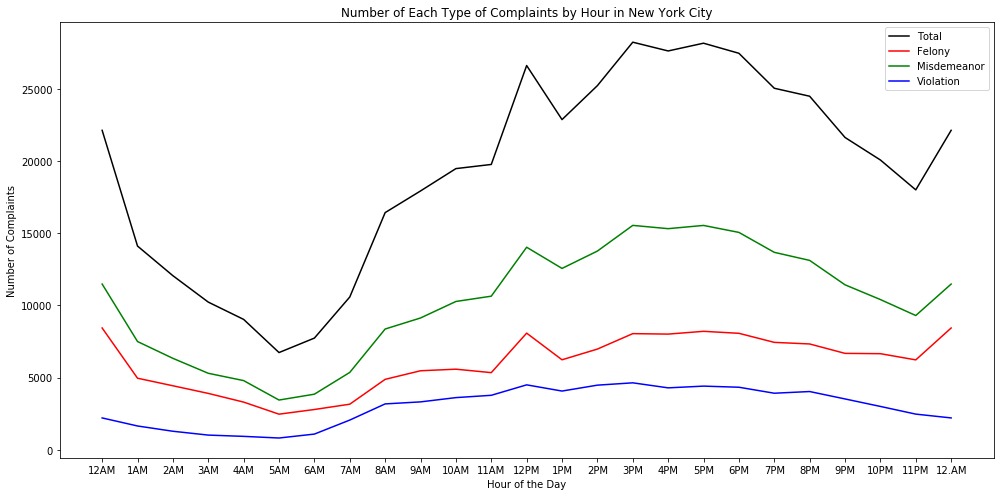

In [81]:
plt.plot(hour, total, color='black')
plt.plot(hour, felony, color='red')
plt.plot(hour, misdemeanor, color='green')
plt.plot(hour, violation, color='blue')
black_line = mlines.Line2D([], [], color='black', label='Total')
red_line = mlines.Line2D([], [], color='red', label='Felony')
green_line = mlines.Line2D([], [], color='green', label='Misdemeanor')
blue_line = mlines.Line2D([], [], color='blue', label='Violation')
plt.legend(handles=[black_line, red_line, green_line, blue_line])
plt.gcf().set_size_inches(14, 7)
plt.ylabel('Number of Complaints')
plt.xlabel('Hour of the Day')
plt.title('Number of Each Type of Complaints by Hour in New York City')
plt.tight_layout()
plt.show()

In [69]:
q_summary_V1(total)

0
The following are outliers:  []


{'min': 6738.0, 'q1': 14114.0, 'q2': 20075.0, 'q3': 25045.0, 'max': 28235.0}

In [70]:
q_summary_V1(manhattan)

0
The following are outliers:  []


{'min': 1476.0, 'q1': 3280.0, 'q2': 5121.0, 'q3': 6396.0, 'max': 7693.0}

In [71]:
q_summary_V1(queens)

0
The following are outliers:  []


{'min': 1541.0, 'q1': 2982.0, 'q2': 4311.0, 'q3': 4938.0, 'max': 5516.0}

In [72]:
q_summary_V1(bronx)

0
The following are outliers:  []


{'min': 1577.0, 'q1': 3067.0, 'q2': 4386.0, 'q3': 5548.0, 'max': 6394.0}

In [73]:
q_summary_V1(brooklyn)

0
The following are outliers:  []


{'min': 1893.0, 'q1': 4194.0, 'q2': 5938.0, 'q3': 7076.0, 'max': 7952.0}

In [74]:
q_summary_V1(staten_island)

0
The following are outliers:  []


{'min': 241.0, 'q1': 566.0, 'q2': 845.0, 'q3': 1010.0, 'max': 1283.0}

In [75]:
q_summary_V1(felony)

0
The following are outliers:  []


{'min': 2470.0, 'q1': 4882.0, 'q2': 6237.0, 'q3': 8016.0, 'max': 8439.0}

In [76]:
q_summary_V1(misdemeanor)

0
The following are outliers:  []


{'min': 3449.0, 'q1': 7501.0, 'q2': 10643.0, 'q3': 13680.0, 'max': 15546.0}

In [77]:
q_summary_V1(violation)

0
The following are outliers:  []


{'min': 819.0, 'q1': 2062.0, 'q2': 3321.0, 'q3': 4071.0, 'max': 4641.0}